In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

os.chdir('/content/drive/MyDrive/MLProj/equal_distribution_data')

#Necessar Libraries

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.models import resnet18
from torchvision.io import read_image
import matplotlib.pyplot as plt
import numpy as np
import time

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os

class CustomAudioSpectrogramDataset(Dataset):
    def __init__(self, main_dir, transform):
        self.main_dir = main_dir
        self.transform = transform
        self.all_img_pairs = []
        self.labels = []
        counter = 0
        for root, dirs, files in os.walk(main_dir):
            if "left-channel-frequency.png" in files and "right-channel-frequency.png" in files:
                left_img_path = os.path.join(root, "left-channel-frequency.png")
                right_img_path = os.path.join(root, "right-channel-frequency.png")
                self.all_img_pairs.append((left_img_path, right_img_path))
                # Assign label based on folder naming convention
                self.labels.append(0 if 'original' in root else 1)
            elif "left-channel-frequency.png" in files:
                print(root)
                left_img_path = os.path.join(root, "left-channel-frequency.png")
                self.all_img_pairs.append((left_img_path, left_img_path))
                self.labels.append(0 if 'original' in root else 1)
                counter += 1
            elif "right-channel-frequency.png" in files:
                print(root)
                right_img_path = os.path.join(root, "right-channel-frequency.png")
                self.all_img_pairs.append((right_img_path, right_img_path))
                self.labels.append(0 if 'original' in root else 1)
                counter += 1
            else:
                print(" Invalid:")
                print(root)
                print(files)
                print("-----------------------------")
                counter += 1
        print("Counter was " , counter)

    def __len__(self):
        return len(self.all_img_pairs)

    def __getitem__(self, idx):
        left_img_path, right_img_path = self.all_img_pairs[idx]
        left_image = read_image(left_img_path)[:3, :, :]  # Select RGB channels
        right_image = read_image(right_img_path)[:3, :, :]  # Select RGB channels

        # Stack the images along the channel dimension
        combined_image = torch.cat((left_image, right_image), 0)

        # Convert combined tensor image to float and scale to [0.0, 1.0]
        combined_image = combined_image.float() / 255.0

        # Apply transformations
        combined_image = self.transform(combined_image)



        return combined_image, self.labels[idx]

# Define transformations
transformations = transforms.Compose([
    transforms.Resize([256, 256]),  # Make sure Resize is compatible with tensor
    transforms.CenterCrop(224),
    transforms.Normalize(mean=[0.485, 0.456, 0.406, 0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225, 0.229, 0.224, 0.225])
])

# Create dataset instances
train_dataset = CustomAudioSpectrogramDataset('./train', transform=transformations)
val_dataset = CustomAudioSpectrogramDataset('./validation', transform=transformations)
test_dataset = CustomAudioSpectrogramDataset('./test', transform=transformations)

print("train_dataset length ", len(train_dataset))
print("val_dataset length ", len(val_dataset))
print("test_dataset length ", len(test_dataset))

# Define the dataloaders #CHANGES
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True, num_workers=4)

# Create a dataset instance
dataset_instance = CustomAudioSpectrogramDataset('./train', transform=transformations)

# Call __getitem__ on a specific index, e.g., 0
dataset_instance.__getitem__(0)

o we decide to take the lr as 0.0001 and run for more epochs with early stopping.



 Invalid:
./train
[]
-----------------------------
Counter was  1
 Invalid:
./validation
[]
-----------------------------
Counter was  1
 Invalid:
./test
[]
-----------------------------
Counter was  1
train_dataset length  1026
val_dataset length  240
test_dataset length  240
 Invalid:
./train
[]
-----------------------------
Counter was  1


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


(tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-1.0899,  0.8201,  0.2673,  ...,  1.4120,  0.8623,  1.4034],
          [-0.1994,  0.6681,  0.4384,  ...,  1.9681,  1.2653,  1.1690],
          [ 0.0623,  0.8238,  0.5864,  ...,  1.8313,  1.0106,  0.8618]],
 
         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-1.6741, -1.1396, -1.3350,  ..., -0.8924, -1.0608, -0.9185],
          [-1.4968, -1.1954, -1.2638,  ..., -0.4078, -0.9492, -1.0148],
          [-1.3978, -1.1325, -1.2218,  ..., -0.5879, -1.0181, -1.1237]],
 
         [[-1.7347, -1.7347, -1.7347,  ..., -1.7347, -1.7347, -1.7347],
          [-1.7347, -1.7347,

#1. Modify ResNet Model for Six-Channel Input

In [ ]:

import torchvision.models as models

# Load a pre-trained ResNet model #CHANGE
model = models.resnet18(pretrained=True)

# Modify the first convolution layer to accept 6-channel input
model.conv1 = torch.nn.Conv2d(6, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

# Modify the final fully connected layer to match the number of classes
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 2)  # Assuming two classes: 'fake' and 'original'

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


#2. Define Loss Function and Optimizer


In [ ]:
criterion = torch.nn.CrossEntropyLoss() #CHANGE
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)


#3. Training the Model


In [ ]:
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    for epoch in range(num_epochs):
        start_time = time.time()
        print('-' * 10)
        print(f'Epoch {epoch+1}/{num_epochs}')

        # Training phase
        model.train()
        train_loss = 0.0
        train_corrects = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            train_corrects += torch.sum(preds == labels.data)

        train_loss = train_loss / len(train_loader.dataset)
        train_acc = train_corrects.double() / len(train_loader.dataset)
        print("                         Training Complete")
        # Validation phase
        model.eval()
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_corrects += torch.sum(preds == labels.data)

        val_loss = val_loss / len(val_loader.dataset)
        val_acc = val_corrects.double() / len(val_loader.dataset)

        end_time = time.time()  # Record the end time for the epoch
        epoch_time = end_time - start_time

        print(f'Train Loss: {train_loss:.4f} Acc: {train_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}')
        print(f'Time taken for epoch:{epoch_time/60:.2f} minutes ({epoch_time:.2f} seconds)')

    total_training_time = time.time() - start_time  # Calculate the total training time
    print(f'Total training time: {total_training_time/60:.2f} minutes ({total_training_time:.2f} seconds)')
    return model

# Train the model
trained_model = train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=5)


----------
Epoch 1/5
                         Training Complete
Train Loss: 0.1623 Acc: 0.9366
Val Loss: 0.7103 Acc: 0.5958
Time taken for epoch:3.75 minutes (225.23 seconds)
----------
Epoch 2/5
                         Training Complete
Train Loss: 0.0434 Acc: 0.9864
Val Loss: 0.8752 Acc: 0.5708
Time taken for epoch:3.76 minutes (225.50 seconds)
----------
Epoch 3/5
                         Training Complete
Train Loss: 0.0321 Acc: 0.9903
Val Loss: 0.3097 Acc: 0.8750
Time taken for epoch:3.66 minutes (219.87 seconds)
----------
Epoch 4/5
                         Training Complete
Train Loss: 0.0575 Acc: 0.9834
Val Loss: 0.6937 Acc: 0.7000
Time taken for epoch:3.66 minutes (219.82 seconds)
----------
Epoch 5/5
                         Training Complete
Train Loss: 0.0261 Acc: 0.9932
Val Loss: 0.1092 Acc: 0.9708
Time taken for epoch:3.74 minutes (224.31 seconds)
Total training time: 3.74 minutes (224.31 seconds)


In [ ]:
import os

# Define the full path for saving the model
model_save_path = '/content/drive/MyDrive/MLProj/ML_Project_Result/trained_model.pth'

# Ensure the directory exists
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)

# Try saving the model, and catch any exceptions
try:
    torch.save(trained_model.state_dict(), model_save_path)
    print(f"Model successfully saved to {model_save_path}")
except Exception as e:
    print(f"Error saving the model: {e}")


Model successfully saved to /content/drive/MyDrive/MLProj/ML_Project_Result/trained_model.pth


# Test The Model

In [ ]:
def test_model(model, test_loader):
    model.eval()
    test_corrects = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            test_corrects += torch.sum(preds == labels.data)
            total += labels.size(0)

    test_acc = test_corrects.double() / total
    print(f'Test Accuracy: {test_acc:.4f}')

# Test the model
test_model(trained_model, test_loader)


Test Accuracy: 0.9417


#Visualize the Results

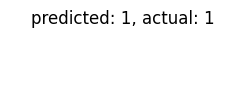

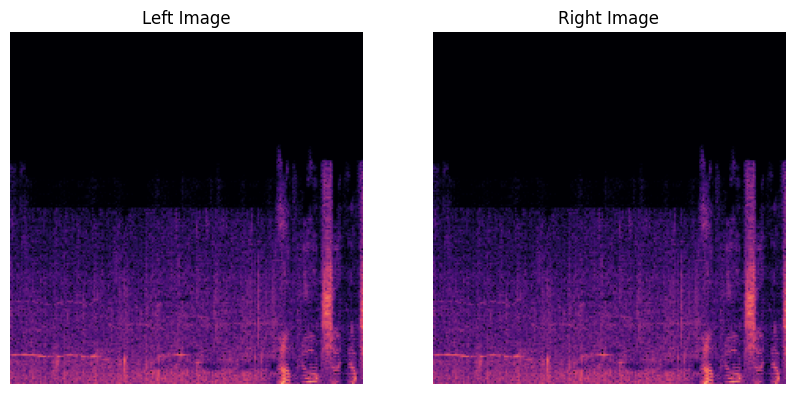

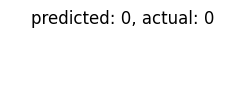

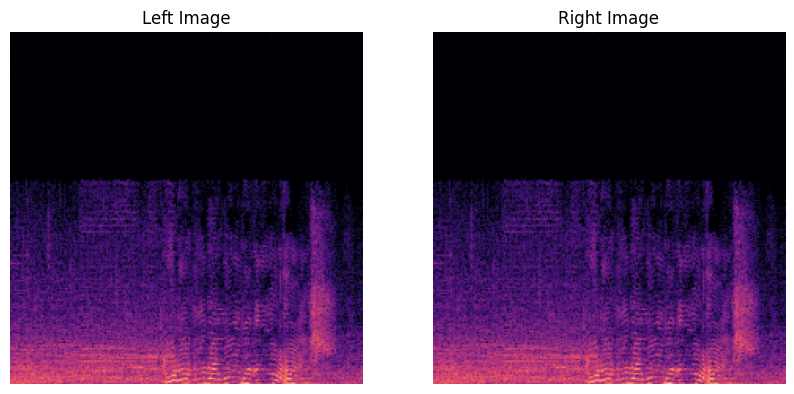

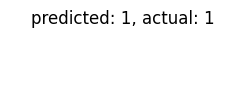

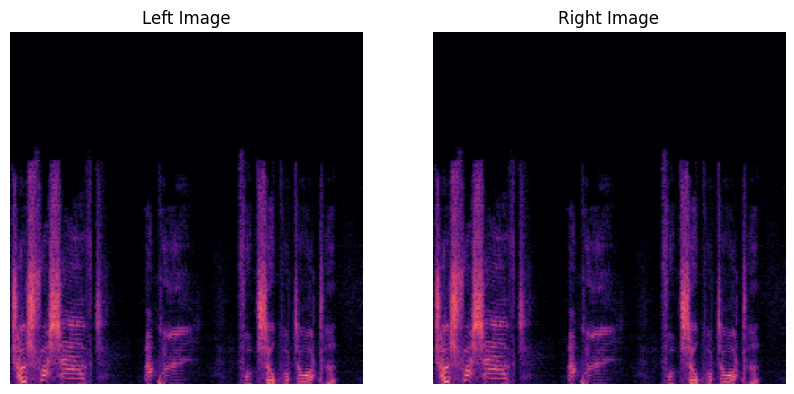

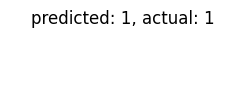

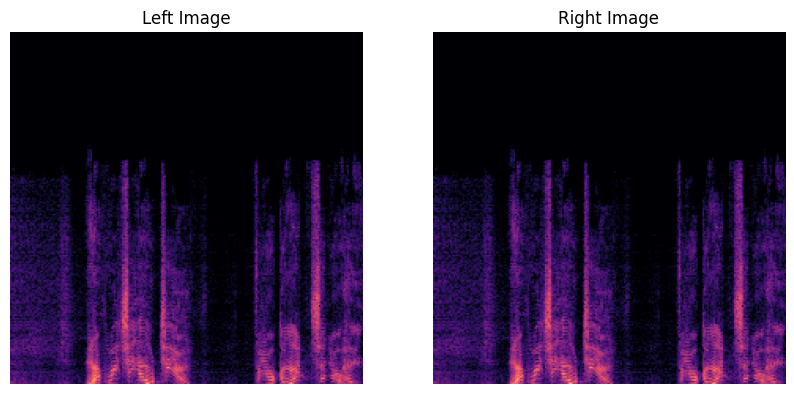

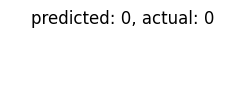

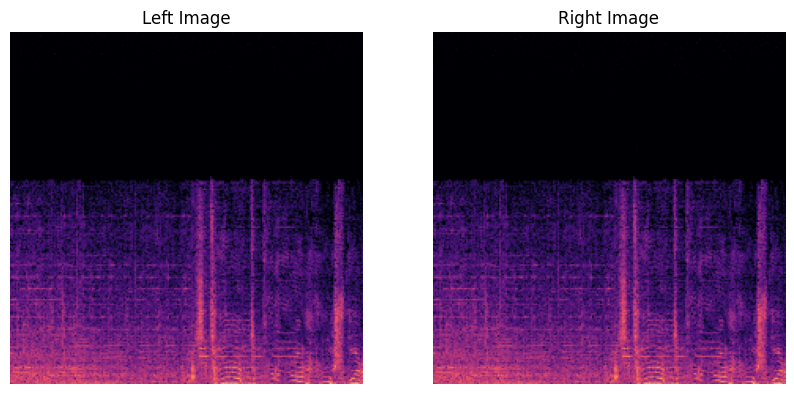

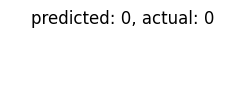

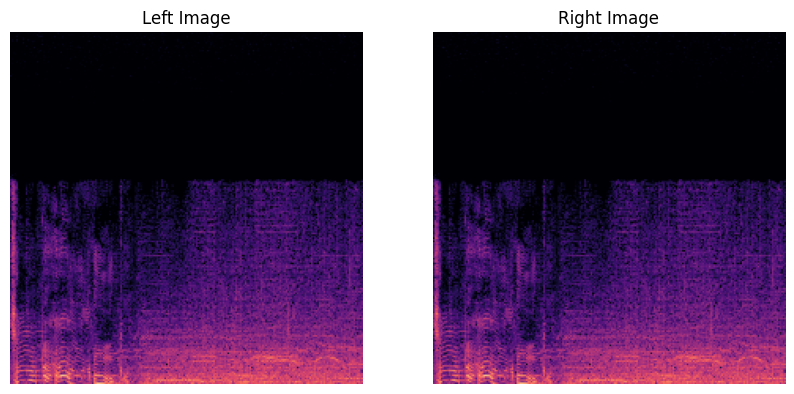

In [ ]:
import matplotlib.pyplot as plt

def imshow(inp, title=None):
    """ Imshow for Tensor for six-channel images """
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])

    # Split the six-channel image into two three-channel images
    left_image = inp[:, :, :3]
    right_image = inp[:, :, 3:6]

    # Normalize each image separately
    left_image = std * left_image + mean
    right_image = std * right_image + mean

    # Clip values to be between 0 and 1
    left_image = np.clip(left_image, 0, 1)
    right_image = np.clip(right_image, 0, 1)

    # Display the images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(left_image)
    axes[0].set_title('Left Image')
    axes[0].axis('off')

    axes[1].imshow(right_image)
    axes[1].set_title('Right Image')
    axes[1].axis('off')

    if title is not None:
        plt.suptitle(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {preds[j]}, actual: {labels[j]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

visualize_model(trained_model, num_images=6)

#Confusion Matrix

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - P

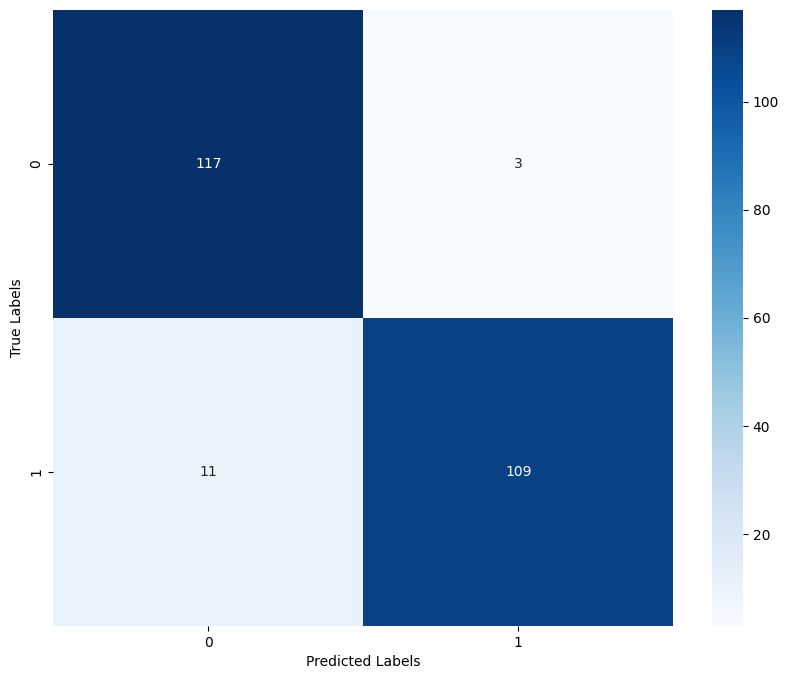

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

def get_all_preds(model, loader):
    all_preds = torch.tensor([]).to(device)
    all_labels = torch.tensor([]).to(device)

    with torch.no_grad():
        for batch in loader:
            inputs, labels = batch
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds = torch.cat((all_preds, preds), dim=0)
            all_labels = torch.cat((all_labels, labels), dim=0)

    return all_preds.cpu().numpy(), all_labels.cpu().numpy()

# Get predictions and labels
predictions, labels = get_all_preds(trained_model, test_loader)

# Compute the confusion matrix
conf_mat = confusion_matrix(labels, predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
